In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_keras import *
from keras.datasets import cifar10

In [2]:
names_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 
              3: 'cat', 4: 'deer', 5: 'dog', 
              6: 'frog', 7: 'horse', 8: 'ship', 
              9: 'truck'}
              
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()


# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [3]:
def process(X):
    X_norm = X.reshape(len(X), X[0].size).astype(float)
    X_norm -= np.mean(X)
    X_norm /= np.std(X)
    #X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm)).astype(float)
    return X_norm

In [4]:
Xtrain_n = process(Xtrain)
Xtest_n = process(Xtest)

testdata = [Xtest_n, ytest]

print(Xtrain_n.shape, ytrain.shape)

(50000, 3072) (50000, 1)


In [8]:
reg1 = regularizers.L2(lambda_=0.01)
reg2 = regularizers.L2(lambda_=0.01)
reg3 = regularizers.L2(lambda_=0.01)

model = models2.Network()

model.add(layers2.Input(Xtrain_n.shape[1]))
model.add(layers2.Dense(3072, 100, activation=activations.sigmoid(), reg=reg1), scale=1)
model.add(layers2.Dense(100, 100, activation=activations.sigmoid(),reg=reg2), scale=1)
model.add(layers2.Dense(100, 10, activation=activations.linear(),reg=reg3), scale=.1)
model.printLayers()

Layer 0: <class 'my_keras.layers2.Input'>, neurons: 3072
Layer 1: <class 'my_keras.layers2.Dense'>, neurons: 100
Layer 2: <class 'my_keras.layers2.Dense'>, neurons: 100
Layer 3: <class 'my_keras.layers2.Dense'>, neurons: 10


Debugging

In [19]:
yb_pred = model.forward(Xtrain_n[0:10,:])
ytrue = ytrain[0:10]


In [26]:
yb_pred[1,:]

array([0.11429995, 0.07612693, 0.15424863, 0.08991349, 0.08486158,
       0.06732908, 0.08758196, 0.12049344, 0.09925921, 0.1055628 ])

In [31]:
model.layers[1].W[0,:]

array([ 0.00186057, -0.00493747,  0.00687714,  0.00186556, -0.00066914,
        0.0038537 , -0.00265879, -0.00459368,  0.0028279 ,  0.00332276,
       -0.00048725, -0.00172156,  0.0061445 , -0.00582068, -0.00311978,
        0.00081883,  0.00104447,  0.00150712,  0.00467226, -0.00476064,
        0.00493139, -0.00282329, -0.00367341,  0.00034028, -0.00494267,
        0.00018841,  0.00208042,  0.00061467,  0.00311382,  0.00151655,
        0.00011952,  0.0012578 , -0.0037466 , -0.00139676, -0.00706372,
       -0.00366129, -0.00616675,  0.00483708,  0.00234445,  0.00481707,
       -0.00669016, -0.0040329 , -0.00226148, -0.00378999, -0.00515295,
        0.00395519,  0.00486388,  0.00031991, -0.0031743 , -0.00169396,
        0.00190817, -0.0048594 , -0.00271808, -0.00325529, -0.00433853,
       -0.00105508,  0.00443437,  0.00370678, -0.00431911,  0.00611647,
       -0.00043637, -0.00383416,  0.00108607, -0.00176175, -0.00626907,
        0.00121644, -0.00478092,  0.0026564 , -0.00012511, -0.00

In [96]:
lossy = losses.MSE_img()
lossy(yb_pred, ytrue)


0.9977181036427625

In [120]:
yb_pred[0]
diff[0]

array([ 0.99729174,  0.99759259,  0.99761771,  0.99764621,  0.99778361,
        0.99744966, -0.00213476,  0.96577349,  0.9973367 ,  0.97989648])

Fitting

In [9]:
loss_hist = model.fit(Xtrain_n, ytrain, loss=losses.MSE_img(), opt=optimizers.SGD(alpha=.01), 
                      metric=metrics.acc_img, testdata=testdata, epochs=50, batch_size=100)

Epoch 0, Train loss: 0.5015
 Accuracy test: 10.00
Epoch 5, Train loss: 0.4812
 Accuracy test: 10.00
Epoch 10, Train loss: 0.4692
 Accuracy test: 10.00
Epoch 15, Train loss: 0.4620
 Accuracy test: 13.41
Epoch 20, Train loss: 0.4575
 Accuracy test: 10.00
Epoch 25, Train loss: 0.4548
 Accuracy test: 10.00
Epoch 30, Train loss: 0.4532
 Accuracy test: 10.00
Epoch 35, Train loss: 0.4519
 Accuracy test: 10.00
Epoch 40, Train loss: 0.4492
 Accuracy test: 14.72
Epoch 45, Train loss: 0.4406
 Accuracy test: 16.56


In [18]:
yb_pred = model.predict(Xtrain_n[0:10])
np.argmax(yb_pred, axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

18.236 18.45


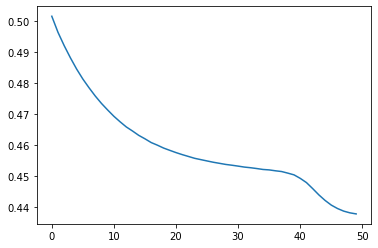

In [10]:
plt.plot(loss_hist)
print(100*metrics.acc_img(model.forward(Xtrain_n), ytrain), 
      100*metrics.acc_img(model.predict(Xtest_n), ytest))
